<a href="https://colab.research.google.com/github/Juanpatino1/Cluster/blob/main/Copia_de_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================================
# 📦 Librerías para análisis de datos y clustering en Google Colab
# ============================================

# Manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento
from sklearn.preprocessing import StandardScaler

# Reducción de dimensionalidad
from sklearn.decomposition import PCA

# Modelos de clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

# Métricas de evaluación
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Kaggle (para descargar datasets directamente)
import kagglehub

# Sistema de archivos
import os

from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score





In [ ]:

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.
Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


In [ ]:
os.listdir(path)


['data.csv']

In [ ]:
df = pd.read_csv(path + "/data.csv")
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.isna().sum()


,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
#Eliminar la columna sin datos
df = df.dropna(axis=1, how="all")


In [ ]:
print(df.shape)
print(df.isna().sum())
df.head()

(569, 32)
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Guardamos la variable objetivo aparte (para evaluar después)
y_true = df["diagnosis"]

# Para el clustering quitamos id y diagnosis
X = df.drop(columns=["id", "diagnosis"])

X.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#estandarizar variables númericas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled.shape)

(569, 30)


In [ ]:
#probar k con k means método del silhouette

sil_scores = {}
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores[k] = sil
    print(f"k = {k}, silhouette = {sil:.4f}")


k = 2, silhouette = 0.3447
k = 3, silhouette = 0.3152
k = 4, silhouette = 0.2742
k = 5, silhouette = 0.1645
k = 6, silhouette = 0.1451
k = 7, silhouette = 0.1470


In [ ]:
#Ajustar K-means con el k elegido y ver cómo se relaciona con M/B

k_opt = 2

kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init="auto")
cluster_labels = kmeans.fit_predict(X_scaled)

# Añadimos el cluster al dataframe original
df["cluster"] = cluster_labels

# Cruzamos cluster vs diagnóstico real
ct = pd.crosstab(df["cluster"], y_true)
print(ct)


diagnosis    B    M
cluster            
0           13  175
1          344   37


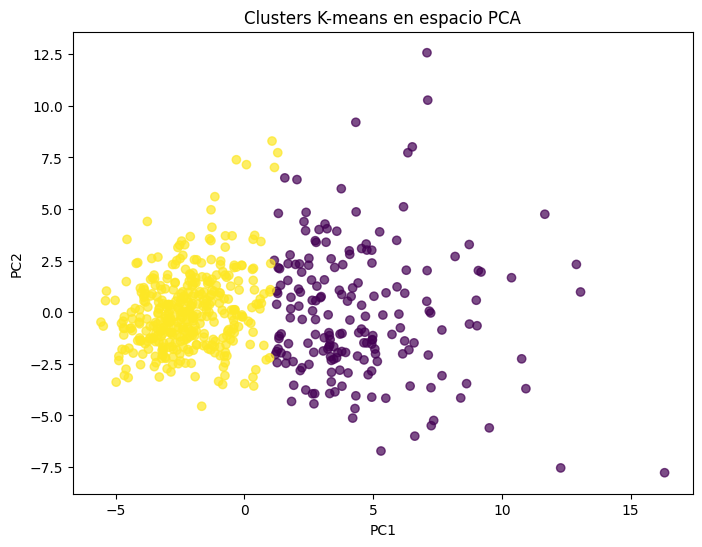

In [ ]:
#Visualizar los clusters con PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["cluster"], alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters K-means en espacio PCA")
plt.show()


In [ ]:
# ============================================
# 📌  MÉTRICAS DEL MODELO DE CLUSTERING
#     - Métricas internas (Silhouette, DB, CH)
#     - Métricas externas (ARI, NMI)
#     - Tabla cluster vs diagnóstico real
# ============================================

# ---------------------------
# 🧮 MÉTRICAS INTERNAS DEL CLUSTERING
#     Evalúan forma, separación y compacidad,
#     SIN usar el diagnóstico real.
# ---------------------------


# Etiquetas de cluster creadas por K-means
labels = df["cluster"].values

sil = silhouette_score(X_scaled, labels)
db  = davies_bouldin_score(X_scaled, labels)
ch  = calinski_harabasz_score(X_scaled, labels)

print("🔹 MÉTRICAS INTERNAS (sin diagnóstico)")
print(f"   👉 Silhouette score:        {sil:.4f}  (más cercano a 1 es mejor)")
print(f"   👉 Davies-Bouldin index:    {db:.4f}  (más bajo es mejor)")
print(f"   👉 Calinski-Harabasz score: {ch:.4f}  (más alto es mejor)")


# ---------------------------
# 🧪 MÉTRICAS EXTERNAS DEL CLUSTERING
#     Comparan los clusters con el diagnóstico real (M/B)
#     para medir concordancia.
# ---------------------------



ari = adjusted_rand_score(y_true, labels)
nmi = normalized_mutual_info_score(y_true, labels)

print("\n🔹 MÉTRICAS EXTERNAS (comparan con diagnóstico real)")
print(f"   👉 Adjusted Rand Index (ARI):      {ari:.4f}  (1 = perfecto, 0 = azar)")
print(f"   👉 Normalized Mutual Information:  {nmi:.4f}  (1 = perfecto, 0 = sin relación)")


# ---------------------------
# 📊 TABLA CLUSTER VS DIAGNÓSTICO
#     Muestra cuántos casos de cada tipo (B/M)
#     cayeron en cada cluster.
# ---------------------------


print("\n🔹 Tabla de contingencia cluster vs diagnosis:")
ct = pd.crosstab(df["cluster"], y_true)
print(ct)

print("\n🔹 Proporción dentro de cada cluster:")
print(pd.crosstab(df["cluster"], y_true, normalize='index'))


🔹 MÉTRICAS INTERNAS (sin diagnóstico)
   👉 Silhouette score:        0.3447  (más cercano a 1 es mejor)
   👉 Davies-Bouldin index:    1.3093  (más bajo es mejor)
   👉 Calinski-Harabasz score: 267.6804  (más alto es mejor)

🔹 MÉTRICAS EXTERNAS (comparan con diagnóstico real)
   👉 Adjusted Rand Index (ARI):      0.6765  (1 = perfecto, 0 = azar)
   👉 Normalized Mutual Information:  0.5620  (1 = perfecto, 0 = sin relación)

🔹 Tabla de contingencia cluster vs diagnosis:
diagnosis    B    M
cluster            
0           13  175
1          344   37

🔹 Proporción dentro de cada cluster:
diagnosis         B         M
cluster                      
0          0.069149  0.930851
1          0.902887  0.097113


In [ ]:
#características principales de cada cluster
df.groupby("cluster")[X.columns].mean()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
cluster,,,,,,,,,,,,,,,,,,,,,
0,17.600702,21.403989,116.699840,997.632447,0.104610,0.157850,0.179992,0.094290,0.197689,0.064415,...,21.350319,28.852394,143.44266,1457.356383,0.146011,0.404052,0.491352,0.190348,0.327127,0.095019
1,12.413378,18.246352,79.765906,485.766404,0.092289,0.077938,0.043801,0.026532,0.173007,0.062000,...,13.761966,24.110472,89.40790,595.981102,0.125637,0.180354,0.164045,0.077232,0.271793,0.078482


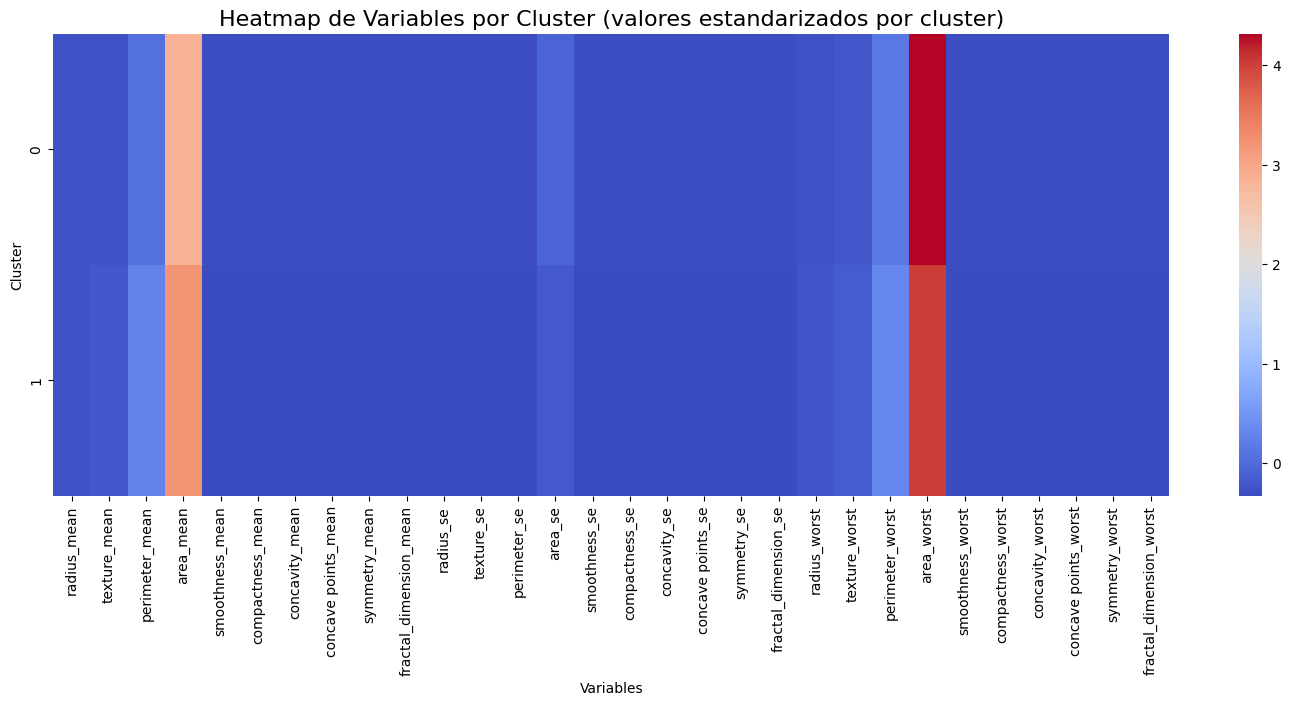

In [ ]:
# ============================================
# 🔥 HEATMAP DE VARIABLES POR CLUSTER
#     (Visualiza qué variables diferencian
#      a los clusters malignos vs benignos)
# ============================================

# Calculamos el promedio de cada variable por cluster
cluster_means = df.groupby("cluster")[X.columns].mean()

# Escalamos fila por fila para que los colores sean interpretables
cluster_means_scaled = cluster_means.apply(lambda x: (x - x.mean()) / x.std(), axis=1)

plt.figure(figsize=(18, 6))
sns.heatmap(cluster_means_scaled, cmap="coolwarm", annot=False)
plt.title("Heatmap de Variables por Cluster (valores estandarizados por cluster)", fontsize=16)
plt.xlabel("Variables")
plt.ylabel("Cluster")
plt.show()
